## Бутстрэп и доверительный интервал

Bootstrap позволяет случайным образом извлекать данные из имеющейся выборки.

Его основная идея состоит в том, чтобы использовать результаты вычеслений по выборкам с целью определить выборочное распределение статистик.

При этом анализируется большое число случайных подвыборок, называемых "бутстрэп-выборками"

Случайным образом генерируется несколько тысяч таких выборок (обычно достаточо 1000 выборок для получения репрезентативных данных о распределении метрики), а потом уже из этого набора можно найти бутстрэп-распределение интересующей нас статистики.

### Применяем метод бутстрэп-распределения

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

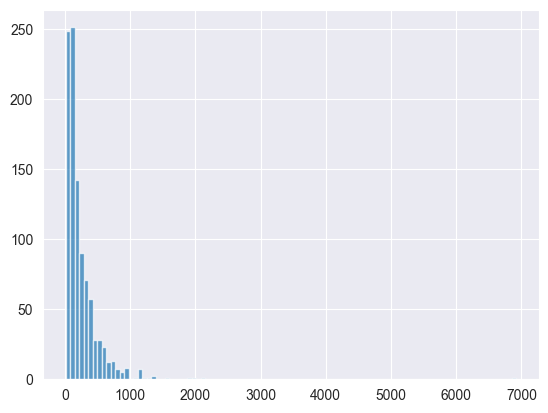

In [2]:
df = np.random.lognormal(5, 1, 1000)

pyplot.hist(df, bins=100, alpha=0.7)
pyplot.show()

В данном случае генерируем случайные подвыборки размером в 300. Здесь сэмплируем выборки 10000 раз просто из того соображения, что этого будет достаточно для получения репрезентативных данных и это займет у нас не много вычеслительных мощностей.

In [3]:
sample_mean = []

for i in range(10000):
    sample_n = np.random.choice(df, size=300)
    sample_mean.append(sample_n.mean())

Выводим на график распределения полученные значения

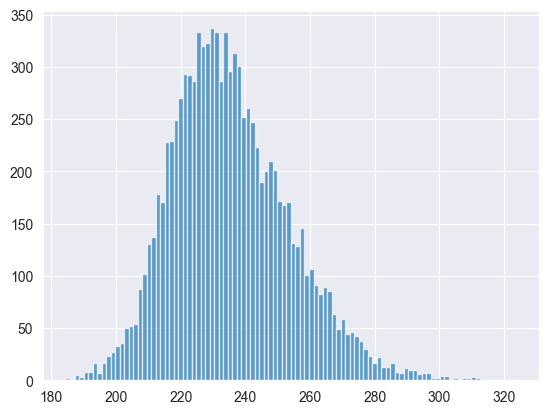

In [4]:
pyplot.hist(sample_mean, bins=100, alpha=0.7)
pyplot.show()

### Делаем вывод на основе бутстрэп-сэмплирования

Вывод сделать очень просто. Мы получили две плотности вероятности для каждой ветки эксперемента и можем сравнить как пересекаются эти плотности.

Есл у нас перекрываются 5 и 95 квантили, значит нет статистической значимой разницы. 

Для демонстрации генерируем еще одну выборку со сдвинутым матожиданием и отразим бутстрэп-распределение на одом графике

In [5]:
df2 = np.random.lognormal(4,1,1000)

sample_mean_2 = []

for i in range(10000):
    sample_n = np.random.choice(df2, size=300)
    sample_mean_2.append(sample_n.mean())

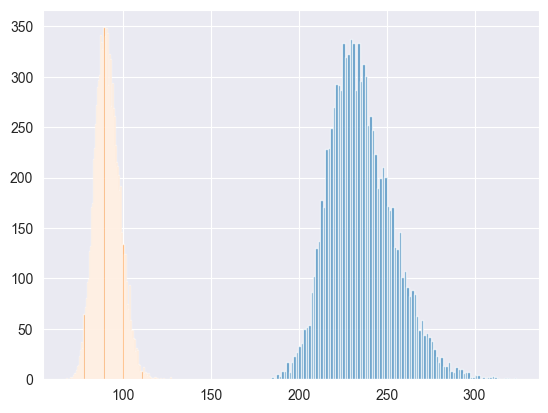

In [6]:
pyplot.hist(sample_mean, bins=100, alpha=0.7)
pyplot.hist(sample_mean_2, bins=100, alpha=0.7)
pyplot.show()

Очевидно что 5 и 95 квантили не пересекаются, а значит в реальном кейсе можно было бы сделать вывод о том, что есть статистическая значимая разница по средниму чеку в двух группах

In [7]:
import seaborn as sns